# Import libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the data

In [3]:
df=df=pd.read_csv("C:\\Users\\natiq\\Desktop\\Persona Data\\persona.csv")

In [4]:
data=df.copy()

In [5]:
df.head()

,PRICE,SOURCE,SEX,COUNTRY,AGE
0,39,android,male,bra,17
1,39,android,male,bra,17
2,49,android,male,bra,17
3,29,android,male,tur,17
4,49,android,male,tur,17


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PRICE    5000 non-null   int64 
 1   SOURCE   5000 non-null   object
 2   SEX      5000 non-null   object
 3   COUNTRY  5000 non-null   object
 4   AGE      5000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 234.4+ KB


In [7]:
df.columns

Index(['PRICE', 'SOURCE', 'SEX', 'COUNTRY', 'AGE'], dtype='object')

In [8]:
df.shape

(5000, 5)

In [9]:
df.dtypes

PRICE       int64
SOURCE     object
SEX        object
COUNTRY    object
AGE         int64
dtype: object

In [10]:
df.isnull().sum().sum()

0

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRICE,5000.0,34.1320,12.464897,9.0,29.0,39.0,39.0,59.0
AGE,5000.0,23.5814,8.995908,15.0,17.0,21.0,27.0,66.0


# EDA

In [12]:
numeric_cols=list(df._get_numeric_data().columns)
print(numeric_cols)

['PRICE', 'AGE']


In [13]:
categoric_cols=list(set(df.columns)-set(numeric_cols))
print(categoric_cols)

['COUNTRY', 'SEX', 'SOURCE']


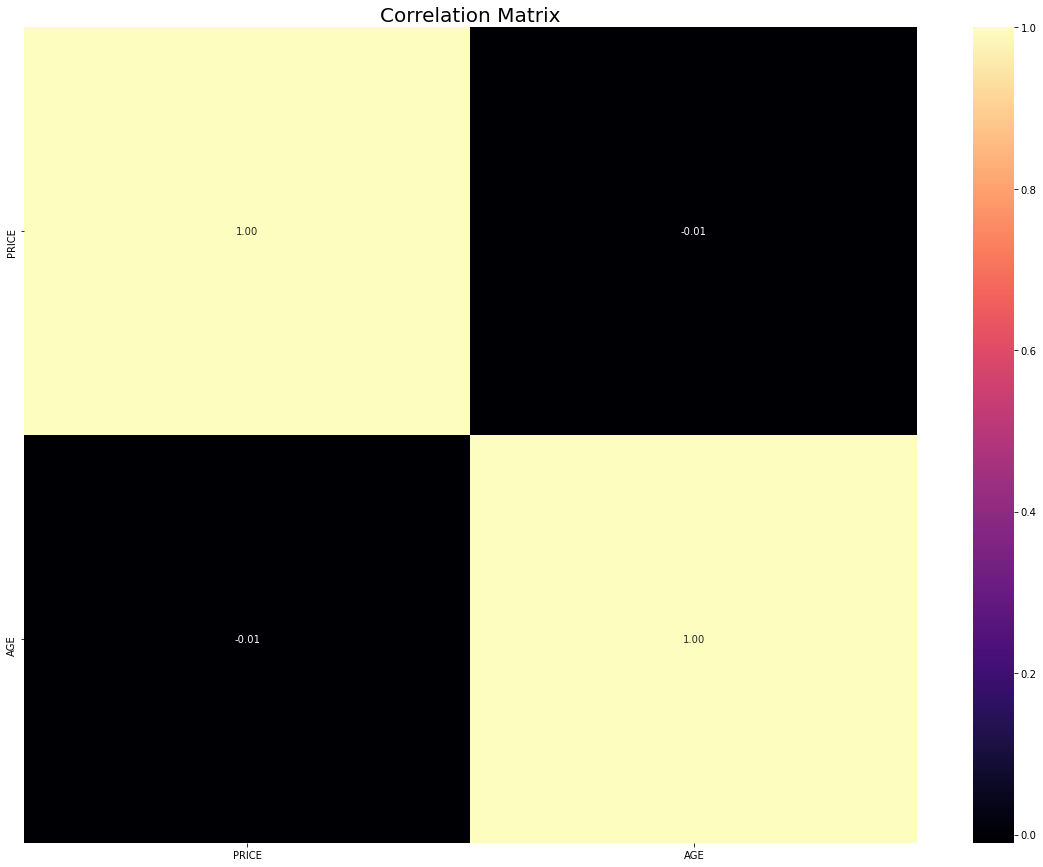

In [14]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [15]:
for col in categoric_cols:
    print(f'###############{col}###############')
    print(df[col].value_counts())

###############COUNTRY###############
usa    2065
bra    1496
deu     455
tur     451
fra     303
can     230
Name: COUNTRY, dtype: int64
###############SEX###############
female    2621
male      2379
Name: SEX, dtype: int64
###############SOURCE###############
android    2974
ios        2026
Name: SOURCE, dtype: int64


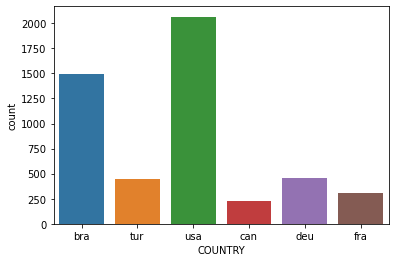

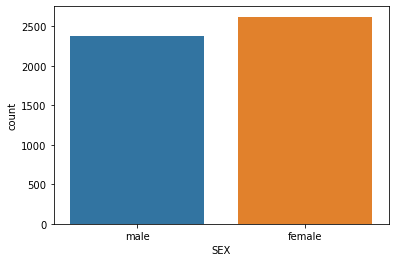

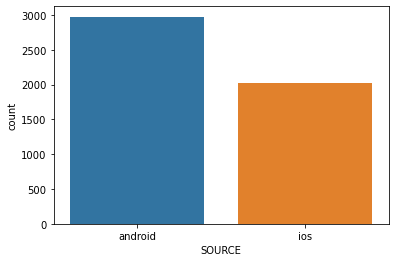

In [16]:
for col in categoric_cols:
    
    sns.countplot(x=df[col])
    plt.show()

Text(0.5, 1.0, 'Country distribution')

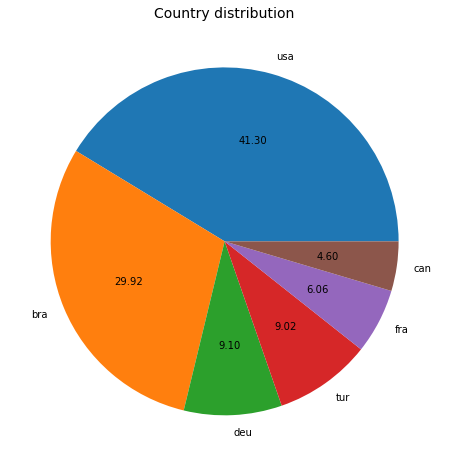

In [17]:
plt.figure(figsize=[16, 8])
plt.pie(x=df['COUNTRY'].value_counts(), autopct="%.2f", labels=df['COUNTRY'].value_counts().index)
plt.title("Country distribution", fontsize=14)

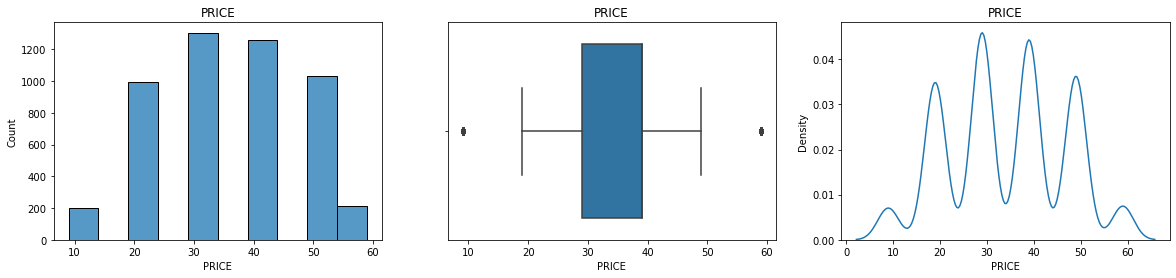

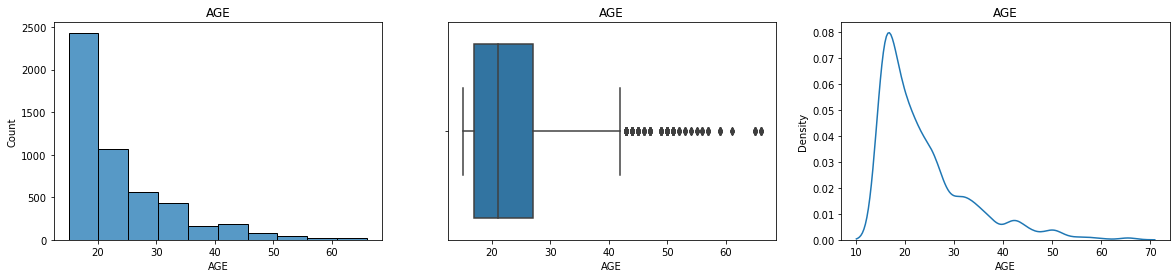

In [43]:
for i in df._get_numeric_data().columns:
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))
    sns.histplot(df[i], bins=10, ax=axes[0])
    axes[0].set_title(i)
    
    sns.boxplot(df[i], ax=axes[1])
    axes[1].set_title(i)
   
    sns.kdeplot(df[i], ax=axes[2])
    axes[2].set_title(i)
    plt.show()

In [18]:
#How much was earned in total from sales by country?
print(df.groupby('COUNTRY').agg({'PRICE':'sum'}))

         PRICE
COUNTRY       
bra      51354
can       7730
deu      15485
fra      10177
tur      15689
usa      70225


In [19]:
#What are the PRICE averages by country?
print(df.groupby('COUNTRY').agg({'PRICE':'mean'}))

             PRICE
COUNTRY           
bra      34.327540
can      33.608696
deu      34.032967
fra      33.587459
tur      34.787140
usa      34.007264


In [20]:
#What are the PRICE averages by SOURCEs?
print(df.groupby('SOURCE').agg({'PRICE':'mean'}))

             PRICE
SOURCE            
android  34.174849
ios      34.069102


In [21]:
#What are the PRICE averages in the COUNTRY-SOURCE breakdown?
df.groupby(["COUNTRY","SOURCE"]).agg({"PRICE":"mean"})

PRICE
COUNTRY SOURCE            
bra     android  34.387029
        ios      34.222222
can     android  33.330709
        ios      33.951456
deu     android  33.869888
        ios      34.268817
fra     android  34.312500
        ios      32.776224
tur     android  36.229437
        ios      33.272727
usa     android  33.760357
        ios      34.371703

In [22]:
#What are the total gains broken down by COUNTRY, SOURCE, SEX, AGE?
df.groupby(["COUNTRY","SOURCE","SEX","AGE"]).agg({"PRICE": "mean"})

PRICE
COUNTRY SOURCE  SEX    AGE           
bra     android female 15   38.714286
                       16   35.944444
                       17   35.666667
                       18   32.255814
                       19   35.206897
...                               ...
usa     ios     male   42   30.250000
                       50   39.000000
                       53   34.000000
                       55   29.000000
                       59   46.500000

[348 rows x 1 columns]

In [23]:
#Sort the output by PRICE
agg_df = df.groupby(["COUNTRY","SOURCE","SEX","AGE"]).agg({"PRICE":"mean"}).sort_values("PRICE", ascending=False)

In [24]:
agg_df.head()

,,,,PRICE
COUNTRY,SOURCE,SEX,AGE,
bra,android,male,46,59.0
usa,android,male,36,59.0
fra,android,female,24,59.0
usa,ios,male,32,54.0
deu,android,female,36,49.0


In [25]:
agg_df.index

MultiIndex([('bra', 'android',   'male', 46),
            ('usa', 'android',   'male', 36),
            ('fra', 'android', 'female', 24),
            ('usa',     'ios',   'male', 32),
            ('deu', 'android', 'female', 36),
            ('deu', 'android', 'female', 51),
            ('deu',     'ios',   'male', 20),
            ('usa', 'android', 'female', 47),
            ('fra',     'ios',   'male', 20),
            ('usa',     'ios',   'male', 59),
            ...
            ('bra', 'android',   'male', 23),
            ('tur', 'android',   'male', 21),
            ('tur',     'ios',   'male', 47),
            ('bra',     'ios', 'female', 34),
            ('bra',     'ios',   'male', 47),
            ('usa',     'ios', 'female', 38),
            ('usa',     'ios', 'female', 30),
            ('can', 'android', 'female', 27),
            ('fra', 'android',   'male', 18),
            ('deu', 'android',   'male', 26)],
           names=['COUNTRY', 'SOURCE', 'SEX', 'AGE'], length=34

In [26]:
agg_df.reset_index(inplace=True)

In [27]:
agg_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE
0,bra,android,male,46,59.0
1,usa,android,male,36,59.0
2,fra,android,female,24,59.0
3,usa,ios,male,32,54.0
4,deu,android,female,36,49.0


In [28]:
#Convert age variable to categorical variable and add it to agg_df
agg_df["AGE_CAT"] = pd.cut(agg_df["AGE"], bins=[0, 18, 24, 30, 40, 70], labels=["0_18", "19_23", "24_30", "31_40", "41_70"])

In [29]:
agg_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_CAT
0,bra,android,male,46,59.0,41_70
1,usa,android,male,36,59.0,31_40
2,fra,android,female,24,59.0,19_23
3,usa,ios,male,32,54.0,31_40
4,deu,android,female,36,49.0,31_40


In [30]:
#Identify new level-based customers
agg_df["customers_level_based"]=[ 
    agg_df['COUNTRY'][i]+'_'+agg_df['SOURCE'][i]+'_'+agg_df['SEX'][i]+'_'+str(agg_df['AGE_CAT'][i])
 for i in agg_df.index]

In [31]:
agg_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_CAT,customers_level_based
0,bra,android,male,46,59.0,41_70,bra_android_male_41_70
1,usa,android,male,36,59.0,31_40,usa_android_male_31_40
2,fra,android,female,24,59.0,19_23,fra_android_female_19_23
3,usa,ios,male,32,54.0,31_40,usa_ios_male_31_40
4,deu,android,female,36,49.0,31_40,deu_android_female_31_40


In [32]:
agg_df["customers_level_based"].value_counts()

usa_android_male_41_70      7
bra_android_female_24_30    6
usa_ios_male_24_30          6
bra_android_female_19_23    6
usa_android_male_31_40      6
                           ..
tur_ios_male_31_40          1
can_ios_male_31_40          1
fra_android_female_24_30    1
can_ios_male_24_30          1
deu_ios_male_31_40          1
Name: customers_level_based, Length: 107, dtype: int64

In [33]:
agg_df.groupby(["customers_level_based"]).agg({'PRICE':'mean'})

,PRICE
customers_level_based,
bra_android_female_0_18,35.645303
bra_android_female_19_23,34.481117
bra_android_female_24_30,33.424603
bra_android_female_31_40,34.898326
bra_android_female_41_70,36.737179
...,...
usa_ios_male_0_18,33.983495
usa_ios_male_19_23,34.901872
usa_ios_male_24_30,34.838143


In [34]:
agg_df=agg_df.groupby(["customers_level_based"]).agg({'PRICE':'mean'}).reset_index()

In [35]:
agg_df.head()

,customers_level_based,PRICE
0,bra_android_female_0_18,35.645303
1,bra_android_female_19_23,34.481117
2,bra_android_female_24_30,33.424603
3,bra_android_female_31_40,34.898326
4,bra_android_female_41_70,36.737179


In [36]:
agg_df["SEGMENT"] = pd.qcut(agg_df["PRICE"], 4, labels=["D","C","B","A"])

In [37]:
agg_df.head()

,customers_level_based,PRICE,SEGMENT
0,bra_android_female_0_18,35.645303,B
1,bra_android_female_19_23,34.481117,B
2,bra_android_female_24_30,33.424603,C
3,bra_android_female_31_40,34.898326,B
4,bra_android_female_41_70,36.737179,A


In [38]:
agg_df.groupby("SEGMENT").agg({"PRICE" : ["mean", "max", "sum"]})

PRICE                        
              mean        max          sum
SEGMENT                                   
D        29.104729  32.244811   785.827672
C        33.357094  34.103727   900.641543
B        34.966008  35.923077   909.116210
A        38.163274  42.333333  1030.408411

# Prediction

###### Classify new customers according to their segments and estimate how much income it can generate.

In [39]:
#For example, which segment does a 35 year old French woman using ios belong to?
new_user1 = "FRA_IOS_FEMALE_31_40"
agg_df[agg_df["customers_level_based"] == new_user1.lower()] #C segmenti

,customers_level_based,PRICE,SEGMENT
62,fra_ios_female_31_40,32.818182,C


In [40]:
#Which segment does a 26 year old American man using IOS belong to?
new_user2 = "USA_IOS_MALE_24_30"
agg_df[agg_df["customers_level_based"] == new_user2.lower()]

,customers_level_based,PRICE,SEGMENT
104,usa_ios_male_24_30,34.838143,B


In [41]:
new_user3 = "TUR_ANDROID_FEMALE_31_40"
agg_df[agg_df["customers_level_based"] == new_user3.lower()]

,customers_level_based,PRICE,SEGMENT
71,tur_android_female_31_40,41.833333,A
